In [1]:
import pandas as pd

annotations_df = pd.read_csv('annotations.csv')
annotations_df.head()

#cut out unnecessary columns, make new dataframe with music presence
music_df = annotations_df[['split','6-1_stationary-music_presence','6-2_mobile-music_presence','6-X_music-from-uncertain-source_presence','6-1_stationary-music_proximity','6-2_mobile-music_proximity','6_music_presence']]
music_df['6_music_presence'].astype(int)
#music_df['6-1_stationary-music_presence'].astype(int)
#music_df['6-2_mobile-music_presence'].astype(int)
#music_df['6-X_music-from-uncertain-source_presence'].astype(int)
#music_df['6-1_stationary-music_proximity'].astype(int)
#music_df['6-2_mobile-music_proximity'].astype(int)

print(music_df)

#music_df = music_df[['6-1_stationary-music_presence','6-2_mobile-music_presence','6-X_music-from-uncertain-source_presence','6-1_stationary-music_proximity','6-2_mobile-music_proximity','6_music_presence']].astype(int)

#music_df['split'].value_counts()


validate = music_df[(music_df['split']=='validate') & (music_df['6_music_presence']==1)].count()
training = music_df[(music_df['split']=='train') & (music_df['6_music_presence']==1)].count()
test = music_df[(music_df['split']=='test') & (music_df['6_music_presence']==1)].count()

print('There are '+ str(validate) + ' occurrences of training music examples')
print('There are '+ str(training) + ' occurrences of validation music examples')
print('There are '+ str(test) + ' occurrences of testing music examples')

#counters
#train_count = 0
#val_count = 0
#test_count = 0

#for index, row in music_df.iterrows():
    #if ((music_df.loc[index,'split']=='validate') and (music_df.loc[index,'6_music_presence']==1)):
        #val_count+=1
   # elif ((music_df.loc[index,'split']=='train') and (music_df.loc[index,'6_music_presence']==1)):
        #train_count+=1
   # elif ((music_df.loc[index,'split']=='test') and (music_df.loc[index,'6_music_presence']==1)):
        #test_count+=1
#print('There are '+ str(train_count) + ' occurrences of training music examples')
#print('There are '+ str(val_count) + ' occurrences of validation music examples')
#print('There are '+ str(test_count) + ' occurrences of testing music examples')




          split  6-1_stationary-music_presence  6-2_mobile-music_presence  \
0      validate                            1.0                        1.0   
1      validate                            0.0                        0.0   
2      validate                            0.0                        0.0   
3      validate                            0.0                        0.0   
4      validate                            0.0                        0.0   
5      validate                            0.0                        0.0   
6      validate                            0.0                        0.0   
7      validate                            0.0                        0.0   
8      validate                            0.0                        0.0   
9      validate                            0.0                        0.0   
10     validate                            0.0                        0.0   
11     validate                            0.0                        0.0   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))


annotations_df = pd.read_csv('annotations.csv')
music_df = annotations_df[['split','audio_filename','annotator_id','6-1_stationary-music_presence','6-2_mobile-music_presence','6-X_music-from-uncertain-source_presence','6-1_stationary-music_proximity','6-2_mobile-music_proximity','6_music_presence']]

criteria = music_df['annotator_id']>0
music_df = music_df[criteria]
music_df.groupby('audio_filename').head()




,split,audio_filename,annotator_id,6-1_stationary-music_presence,6-2_mobile-music_presence,6-X_music-from-uncertain-source_presence,6-1_stationary-music_proximity,6-2_mobile-music_proximity,6_music_presence
0,validate,00_000066.wav,95,1.0,1.0,1.0,near,near,1
1,validate,00_000066.wav,108,0.0,0.0,0.0,-1,-1,0
2,validate,00_000066.wav,127,0.0,0.0,0.0,-1,-1,0
3,validate,00_000071.wav,64,0.0,0.0,0.0,-1,-1,0
4,validate,00_000071.wav,66,0.0,0.0,0.0,-1,-1,0
5,validate,00_000071.wav,133,0.0,0.0,0.0,-1,-1,0
6,validate,00_000085.wav,64,0.0,0.0,0.0,-1,-1,0
7,validate,00_000085.wav,133,0.0,0.0,0.0,-1,-1,0
8,validate,00_000085.wav,152,0.0,0.0,0.0,-1,-1,0
9,validate,00_000118.wav,45,0.0,0.0,0.0,-1,-1,0


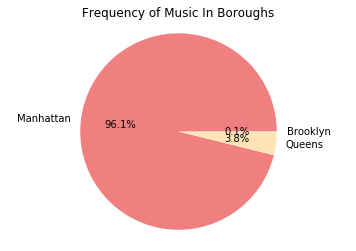

<Figure size 207360x20736 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#plot by borough

_df = annotations_df[annotations_df['annotator_id']>0]
temp_1 = _df.groupby('audio_filename')['6_music_presence'].sum()>0
audio_files_w_music = temp_1[temp_1 == True].index
_df[_df['audio_filename'].isin(audio_files_w_music)]

borough_freq = _df['borough'].value_counts()
my_labels = 'Manhattan','Queens','Brooklyn'

my_colors = ['lightcoral','moccasin','lightcyan']
plt.pie(borough_freq, labels = my_labels, autopct = '%1.1f%%', colors = my_colors)
plt.title('Frequency of Music In Boroughs')
plt.axis('equal')
plt.figure(figsize=(2880,288))
plt.show()


In [4]:
#plot by stationary music

#plt.figure(figsize=(20, 10))

annotations_df = pd.read_csv('annotations.csv')
music_df = annotations_df[['split','borough','audio_filename','annotator_id','6-1_stationary-music_presence','6-2_mobile-music_presence','6-X_music-from-uncertain-source_presence','6-1_stationary-music_proximity','6-2_mobile-music_proximity','6_music_presence']]

(music_df['6-1_stationary-music_presence']==1).count()

(music_df['6-2_mobile-music_presence']==1).count()

(music_df['6-X_music-from-uncertain-source_presence']==1).count()


         


56780

Text(0.5,1,'Presence of Music from 2016-2019')

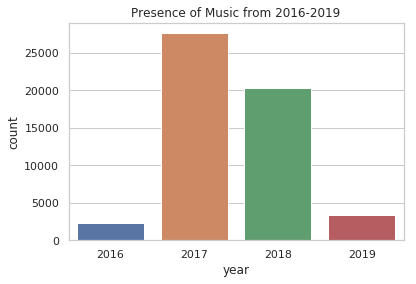

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
annotations_df = pd.read_csv('annotations.csv')


_df = annotations_df[annotations_df['annotator_id']>0]
temp_1 = _df.groupby('audio_filename')['6_music_presence'].sum()>0
audio_files_w_music = temp_1[temp_1 == True].index
_df[_df['audio_filename'].isin(audio_files_w_music)]

sns.set(style="whitegrid")
sns.countplot(x ='year', data=_df)
plt.title('Presence of Music from 2016-2019')

#_df['time'] = _df[['year', 'week','day']].astype(str).agg('_'.join, axis=1)
#pd.to_datetime(_df['time'], format = '%Y_%W_%w')

#plt.figure(figsize=(20, 10))

#_df['6_music_presence'].plot(linewidth=0.5)
#plt.scatter(_df['time'].tolist(), _df[_df['6_music_presence'].isin()])




Text(0.5,1,'Presence of Music throughout the year')

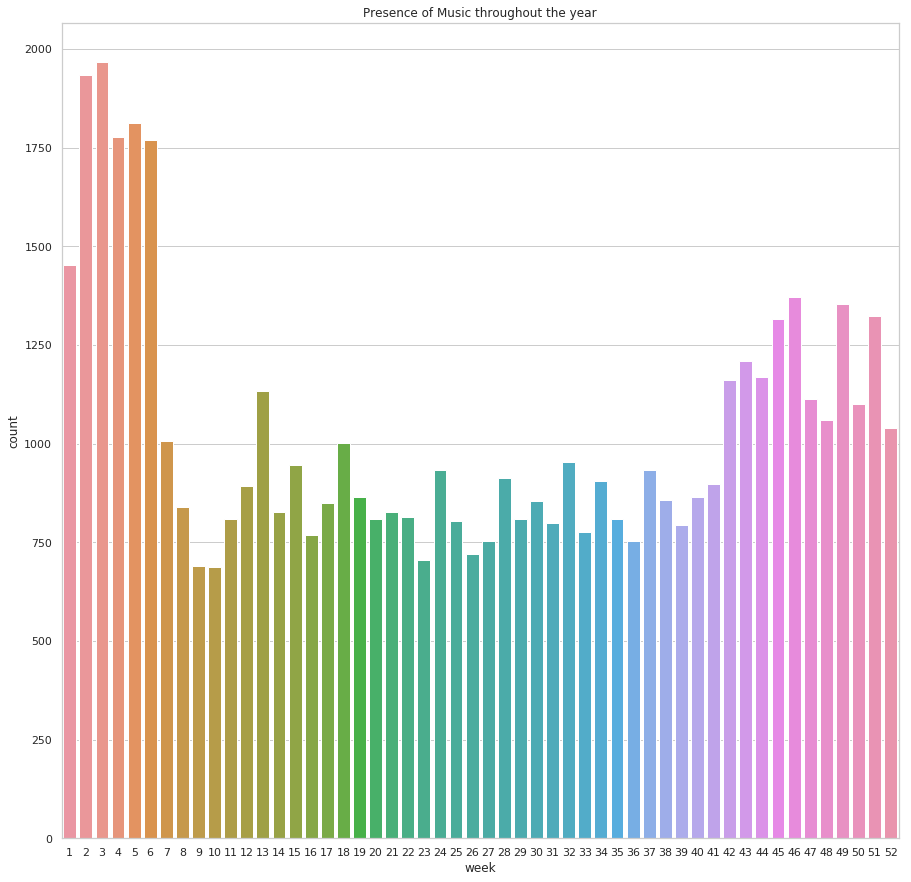

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(x ='week', data=_df)
plt.title('Presence of Music throughout the year')

Text(0.5,1,'Presence of Music from Sunday-Saturday')

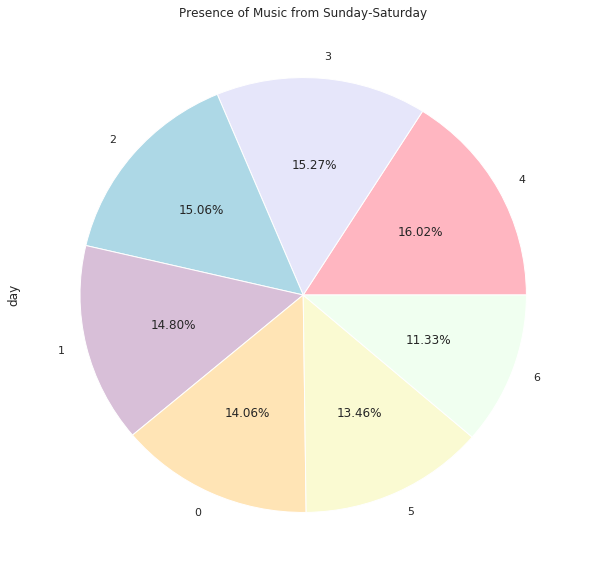

In [7]:
plt.figure(figsize=(10,10))
colors = ['lightpink','lavender','lightblue', 'thistle', 'moccasin','lightgoldenrodyellow', 'honeydew']
ax = _df['day'].value_counts()
ax.plot.pie(colors = colors, autopct='%.2f%%')
plt.title('Presence of Music from Sunday-Saturday')


Text(0.5,1,'Presence of Music throughout the Day')

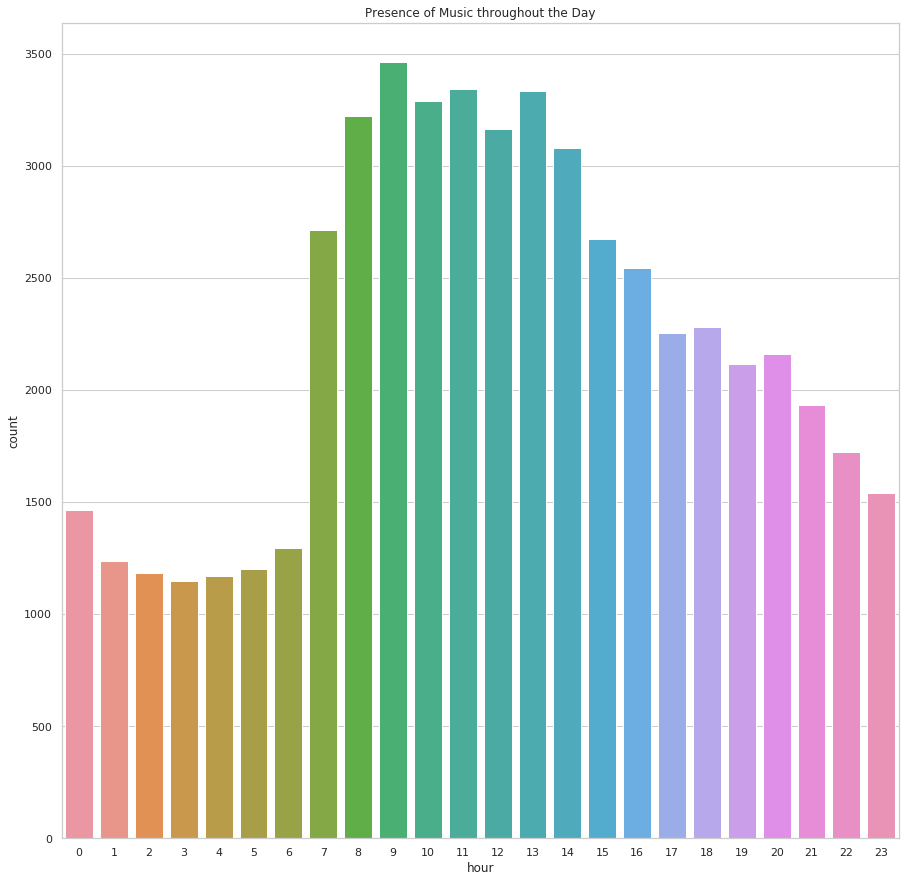

In [8]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.countplot(x ='hour', data=_df)
plt.title('Presence of Music throughout the Day')

In [64]:
import numpy as np
#_df2 = pd.DataFrame(_df, columns = ['sensor_id','']) 
#_df['sensor_id'].value_counts()
#_df.groupby(['sensor_id']).apply(list)
#_df2 = pd.DataFrame
#_df2['sensor'] = _df.groupby(['sensor_id']).apply(list)
#_df.groupby(['sensor_id'])['6_music_presence'].apply(list)

#_df2 = annotations_df[annotations_df['annotator_id']>0]
#temp_2 = _df.groupby('sensor_id')['6_music_presence'].sum()>0
#sensors_w_music = temp_2[temp_2 == True].index
#_df2[_df2['sensor_id'].isin(sensors_w_music)]


df = pd.DataFrame(_df.groupby('sensor_id')['6_music_presence'].value_counts())

df.drop(df[df['6_music_presence'] == 0].index, inplace=True)
print(df)



                            6_music_presence
sensor_id 6_music_presence                  
0         0                             1449
          1                               24
1         0                             3191
          1                              202
2         0                             1906
          1                               29
3         0                             1717
          1                               47
4         0                             1886
          1                               85
5         0                              746
          1                              418
6         0                             3033
          1                              237
7         0                              933
          1                               12
8         0                              255
          1                                3
9         0                              745
          1                               11
10        

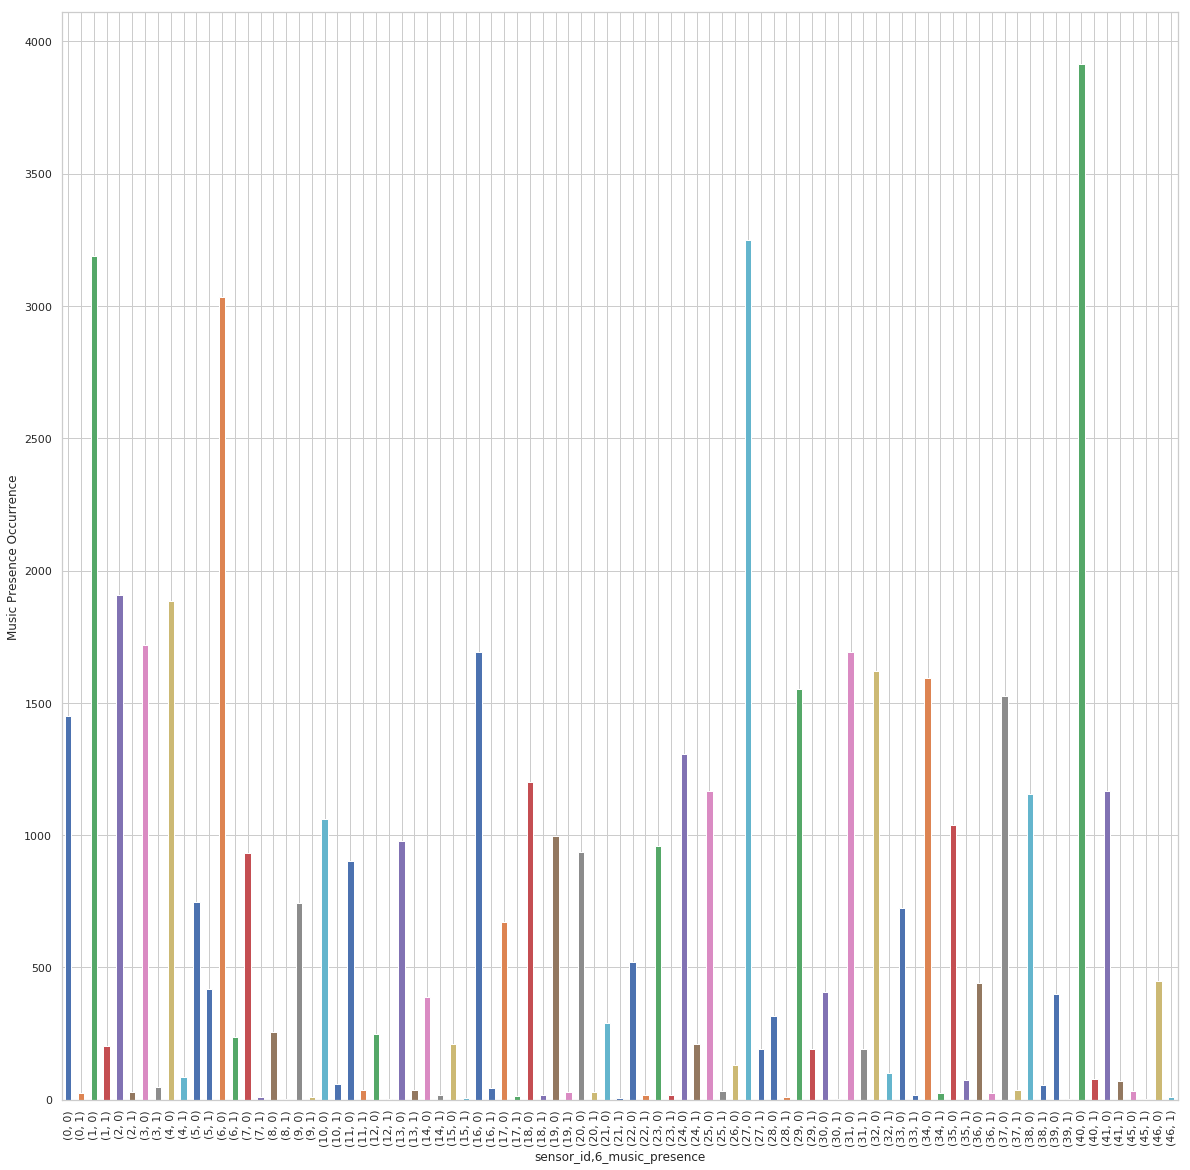

In [63]:
plt.figure(figsize=(20,20))
plt.xlabel('Sensor')
plt.ylabel('Music Presence Occurrence')
_df.groupby('sensor_id')['6_music_presence'].value_counts().plot.bar()
